In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df)
df = df.loc[df['anomaly'] == 0]
print(df)

X = df[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df['employee_role']
param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

all_models = [
    ("mult_nb", MultinomialNB()),
    ("bern_nb", BernoulliNB()),
    ("nn", MLPClassifier()),
    ("knn", KNeighborsClassifier(5)),
    ("lr", LogisticRegression()),
    ("rf", RandomForestClassifier()),
    ("dt", DecisionTreeClassifier()),
    ("svm", SVC(kernel='linear', probability=True))
]

for name, model in all_models: 
  clf=model
  
  #result = cross_val_predict(clf, X, y, cv=5) # 5-fold Cross Validation
  #conf_mat = confusion_matrix(y, result)
  #print(conf_mat)
  #print("Precision Score : ",precision_score(y, result, average='micro'))
  #print("Recall Score : ",recall_score(y, result, average='micro'))
  scoring = ['precision_macro', 'recall_macro', 'f1_macro']
  scores = cross_validate(clf, X, y, cv=5)
  #print(scores)
  print(name + '&' + str(sum(scores['test_score'])/len(scores['test_score']))+'\\\\')
  #cross_val_score(clf, X, y, cv=5, scoring='precision_macro')

  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='precision_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_micro'))
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                      0        0
1          emp_0  03/02  ...                      0        0
2          emp_0  05/02  ...                      0        0
3          emp_0  13/02  ...                      0        0
4          emp_0  03/03  ...                      0        0
...          ...    ...  ...                    ...      ...
24643     emp_99  22/12  ...                      0        0
24644     emp_99  24/12  ...                      0        0
24645     emp_99  26/12  ...                      0        0
24646     emp_99  28/12  ...                      0        0
24647     emp_99  30/12  ...                      0        0

[24648 rows x 24 columns]
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lr&0.881662242481619\\
rf&0.8892800034040669\\
dt&0.8886211604969226\\
svm&0.8710802563865879\\


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print('training all: '+str(df_first.shape[0]))
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training.shape[0])

df_testing = df.loc[df['month'] > 8]
print(df_testing.shape[0])

df_testing_anomaly = df.loc[df['anomaly'] == 1]
print(df_testing_anomaly.shape[0])

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

all_models = [
    ("mult_nb", MultinomialNB()),
    ("bern_nb", BernoulliNB()),
    ("knn", KNeighborsClassifier(5)),
    ("nn", MLPClassifier()),
    ("lr", LogisticRegression()),
    ("rf", RandomForestClassifier()),
    ("dt", DecisionTreeClassifier()),
    ("svm", SVC(kernel='linear', probability=True))
]

for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict(S)
  #print(result)
  idx=0
  tp=0
  tn=0
  fp=0
  fn=0
  for res in result:
    if(res==t[idx]):
      if(anomaly_list[idx]==0):
        tn=tn+1
      else:
        fn=fn+1
    else:
      if(anomaly_list[idx]==1):
        tp=tp+1
      else:
        fp=fp+1
    idx=idx+1
  #print(tp, tn, fp, fn)
  acc = float ((tp+tn)/(tp+tn+fp+fn))
  prec = float (tp/(tp+fp))
  rec =  float (tp/(tp+fn))
  f1=2*prec*rec/(prec+rec)
  print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
training all: 16512
16203
8136
362
mult_nb & 0.8804080629301868 & 0.03722334004024145 & 0.6981132075471698 & 0.07067812798471824\\
bern_nb & 0.7761799410029498 & 0.024731182795698924 & 0.8679245283018868 & 0.04809200209095661\\
nn & 0.9085545722713865 & 0.04479578392621871 & 0.6415094339622641 & 0.08374384236453201\\
knn & 0.8734021632251721 & 0.029836381135707413 & 0.5849056603773585 & 0.056776556776556776\\


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr & 0.8909783677482792 & 0.0457516339869281 & 0.7924528301886793 & 0.08650875386199794\\
rf & 0.913102261553589 & 0.04073033707865169 & 0.5471698113207547 & 0.0758169934640523\\
dt & 0.9134709931170109 & 0.04979253112033195 & 0.6792452830188679 & 0.09278350515463916\\
svm & 0.9090462143559489 & 0.046235138705416116 & 0.660377358490566 & 0.08641975308641976\\


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print(df_first)
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training)

df_testing = df.loc[df['month'] > 8]
print(df_testing)

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

all_models = [
    ("mult_nb", MultinomialNB()),
    ("bern_nb", BernoulliNB()),
    ("svm", SVC(kernel='linear', probability=True)),
    ("nn", MLPClassifier()),
    ("knn", KNeighborsClassifier(5)),
    ("lr", LogisticRegression()),
    ("rf", RandomForestClassifier()),
    ("dt", DecisionTreeClassifier())
]

th_list = np.arange(0.05, 1.0, 0.05)
print(th_list)
allacc_list=[]
allprec_list=[]
allrec_list=[]
allf1_list=[]
allth_list=[]

for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict_proba(S)
  #print(result)
  
  list_class = clf.classes_.tolist()
  acc_list=[]
  prec_list=[]
  rec_list=[]
  f1_list=[]
  for threshold in th_list:
    idx=0
    tp=0
    tn=0
    fp=0
    fn=0
    for res in result:
      if(res[list_class.index(t[idx])]>threshold):
        if(anomaly_list[idx]==0):
          tn=tn+1
        else:
          fn=fn+1
      else:
        if(anomaly_list[idx]==1):
          tp=tp+1
        else:
          fp=fp+1
      idx=idx+1
    acc = float ((tp+tn)/(tp+tn+fp+fn))
    prec = float (tp/(tp+fp))
    rec =  float (tp/(tp+fn))
    f1=2*prec*rec/(prec+rec)
    #print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')
    #th_list.append(threshold)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)
  allacc_list.append(acc_list)
  allprec_list.append(prec_list)
  allrec_list.append(rec_list)
  allf1_list.append(f1_list) 
  

Mounted at /content/gdrive
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
      employeeID   date employee_role  ...  number_of_otherbrowser  anomaly  month
0          emp_0  01/01    Head of IT  ...                       0        0      1
1          emp_0  03/02    Head of IT  ...                       0        0      2
2          emp_0  05/02    Head of IT  ...                       0        0      2
3          emp_0  13/02    Head of IT  ...                       0        0      2
4          emp_0  03/03    Head of IT  ...                       0        0      3
...          ...    ...           ...  ...                     ...      ...    ...
24584     emp

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
idx=0
for name, model in all_models:
  print(int(allf1_list[idx][1]*1000))
  idx+=1

152
893
208
375
115
264
383
507


In [ ]:
print(allf1_list[2])

[0.3960396039603961, 0.19534883720930232, 0.13333333333333333, 0.14988290398126464, 0.11908931698774079, 0.11544991511035653, 0.09775429326287978, 0.10937499999999999, 0.10673443456162643, 0.0916030534351145, 0.08292201382033564, 0.08061420345489444, 0.07567567567567568, 0.05797101449275362, 0.05630026809651475, 0.043259557344064385, 0.0417070805043647, 0.028762541806020066, 0.021171836533727232]


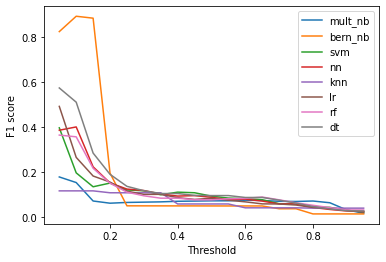

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allf1_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.show()

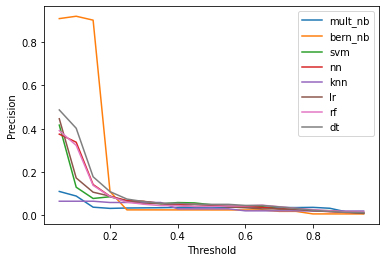

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allprec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.show()

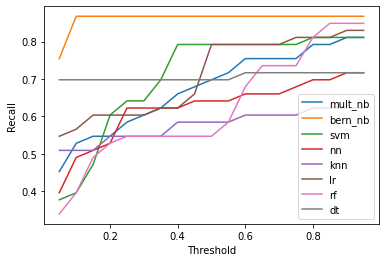

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allrec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.show()

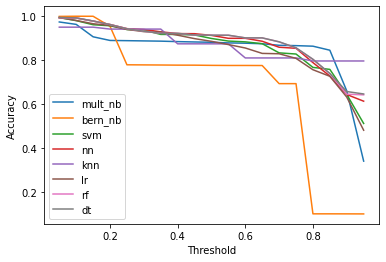

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allacc_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')

df = df.sample(frac=1).reset_index(drop=True)

training_percentage=70

number_of_training = int (df.shape[0]*training_percentage/100)

df_training = df[:number_of_training]
print(df_training)
df_training = df_training.loc[df_training['anomaly'] == 0]

df_testing = df[number_of_training:]
print(df_testing)

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

all_models = [
    ("mult_nb", MultinomialNB()),
    ("bern_nb", BernoulliNB()),
    ("linear svc", SVC(kernel='linear', probability=True)),
    ("nn", MLPClassifier()),
    ("knn_binary", KNeighborsClassifier(5)),
    ("lr", LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)),
    ("rf_binary", RandomForestClassifier()),
    ("dt_binary", DecisionTreeClassifier())
]

threshold=0.15

for name, model in all_models: 
  clf=model
  print(name)
  clf.fit(X, y)
  result = clf.predict_proba(S)
  #print(result)
  idx=0
  tp=0
  tn=0
  fp=0
  fn=0

  list_class = clf.classes_.tolist()

  for res in result:
    if(res[list_class.index(t[idx])]>threshold):
      if(anomaly_list[idx]==0):
        tn=tn+1
      else:
        fn=fn+1
    else:
      if(anomaly_list[idx]==1):
        tp=tp+1
      else:
        fp=fp+1
    idx=idx+1
  print(tp, tn, fp, fn)
  prec = float (tp/(tp+fp))
  rec =  float (tp/(tp+fn))
  f1=2*prec*rec/(prec+rec)
  print(prec, rec, f1)
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      employeeID   date  ... number_of_otherbrowser  anomaly
0         emp_83  05/05  ...                      0        0
1         emp_63  04/04  ...                      0        0
2         emp_47  24/10  ...                      0        0
3         emp_38  08/08  ...                      0        0
4         emp_40  16/05  ...                      0        0
...          ...    ...  ...                    ...      ...
17248    emp_103  28/01  ...                      0        0
17249    emp_115  05/07  ...                      0        0
17250    emp_102  27/07  ...                      0        0
17251     emp_37  24/07  ...                      0        0
17252    emp_121  10/07  ...                      0        0

[17253 rows x 24 columns]
      employeeID   date  ... number_of_otherbrowser  anomaly
17253    emp_112  10/09  ...                     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


57 6908 389 41
0.12780269058295965 0.5816326530612245 0.20955882352941177
rf_binary
58 7173 124 40
0.31868131868131866 0.5918367346938775 0.41428571428571426
dt_binary
74 7169 128 24
0.36633663366336633 0.7551020408163265 0.49333333333333323
